In [1]:
import os
from pathlib import Path
from dotenv import load_dotenv
abs_path = Path(r'C:/users/makyol/documents/nufintech/.env')
#load_dotenv(abs_path)
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
import datetime
from datetime import date
import pandas as pd
import numpy as np
import time
import pytz
from datetime import timedelta

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
!pip install alpaca-trade-api
import alpaca_trade_api as tradeapi

     |████████████████████████████████| 78 kB 1.1 MB/s eta 0:00:011
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

### df.info()

In [22]:
df.dropna(axis=0, inplace=True)
df.isna().mean()

F_1_m_returns          0.00000
1_m_returns            0.00000
excess_F_1_m_returns   0.00000
excess_1_m_returns     0.00000
dtype: float64

# Machine Learning

In [23]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [24]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df.dropna(inplace=True,axis=0)
X = df.drop(columns=['F_1_m_returns','excess_F_1_m_returns'])
# we can drop various columns depending on what we want to use for prediction
#X.drop(columns=['60_m_vol_z_score'], inplace=True)
X.drop(columns=['1_m_returns'], inplace=True)
#X.drop(columns=['1_m_returns','2_m_returns','3_m_returns','4_m_returns','5_m_returns','10_m_returns','15_m_returns','30_m_returns','60_m_returns','60_m_vol_z_score'], inplace=True)
#X.drop(columns=['excess_2_m_returns','excess_3_m_returns','excess_4_m_returns','excess_5_m_returns','excess_10_m_returns','excess_15_m_returns','excess_30_m_returns','excess_60_m_returns'], inplace=True)
# creating the target variable
y = np.where(df['excess_F_1_m_returns']>0,1,0)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
X.describe()

,excess_1_m_returns
count,3112.00000
mean,0.00000
std,0.00057
min,-0.00670
25%,-0.00020
50%,0.00000
75%,0.00021
max,0.00479


In [27]:
X.head()

excess_1_m_returns
level_0 level_1                                      
AAPL    2015-01-02 14:31:00+00:00            -0.00055
        2015-01-02 14:32:00+00:00            -0.00062
        2015-01-02 14:33:00+00:00            -0.00165
        2015-01-02 14:34:00+00:00            -0.00017
        2015-01-02 14:35:00+00:00             0.00090

In [28]:
from sklearn.linear_model import LogisticRegression
steps = [('scaler', StandardScaler()),
         ('model',LogisticRegression())]         
pipeline = Pipeline(steps)        
cv=pipeline
cv.fit(X,y)    
y_pred = cross_val_predict(cv, X, y)        
print(confusion_matrix(y, y_pred))        
print(classification_report(y, y_pred, digits=4))

[[1948    6]
 [1151    7]]
              precision    recall  f1-score   support

           0     0.6286    0.9969    0.7710      1954
           1     0.5385    0.0060    0.0120      1158

    accuracy                         0.6282      3112
   macro avg     0.5835    0.5015    0.3915      3112
weighted avg     0.5951    0.6282    0.4886      3112



In [36]:
import statsmodels.api as sm 
import pandas as pd
log_reg = sm.Logit(y, X).fit() 
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.691012
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3112
Model:                          Logit   Df Residuals:                     3111
Method:                           MLE   Df Model:                            0
Date:                Fri, 25 Sep 2020   Pseudo R-squ.:                -0.04688
Time:                        04:57:42   Log-Likelihood:                -2150.4
converged:                       True   LL-Null:                       -2054.1
Covariance Type:            nonrobust   LLR p-value:                       nan
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_1_m_returns  -232.8452     64.898     -3.588      0.000    -360.043    -105.648


In [37]:
from sklearn.tree import DecisionTreeClassifier
steps = [('scaler', StandardScaler()),
         ('model',DecisionTreeClassifier(random_state=0))]         
pipeline = Pipeline(steps)        
y_pred = cross_val_predict(pipeline, X, y)        
print(confusion_matrix(y, y_pred))        
print(classification_report(y, y_pred, digits=4))

[[1354  600]
 [ 575  583]]
              precision    recall  f1-score   support

           0     0.7019    0.6929    0.6974      1954
           1     0.4928    0.5035    0.4981      1158

    accuracy                         0.6224      3112
   macro avg     0.5974    0.5982    0.5977      3112
weighted avg     0.6241    0.6224    0.6232      3112



In [38]:
from sklearn.ensemble import RandomForestClassifier
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
steps = [('scaler', StandardScaler()),
         ('model',RandomForestClassifier(random_state=0))]         
pipeline = Pipeline(steps)        
y_pred = cross_val_predict(pipeline, X, y)   
print(confusion_matrix(y, y_pred))        
print(classification_report(y, y_pred, digits=4))

[[1351  603]
 [ 572  586]]
              precision    recall  f1-score   support

           0     0.7025    0.6914    0.6969      1954
           1     0.4929    0.5060    0.4994      1158

    accuracy                         0.6224      3112
   macro avg     0.5977    0.5987    0.5981      3112
weighted avg     0.6245    0.6224    0.6234      3112



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
steps = [('scaler', StandardScaler()),
         ('model',GradientBoostingClassifier(random_state=0))]         
pipeline = Pipeline(steps)        
y_pred = cross_val_predict(pipeline, X, y)       
print(confusion_matrix(y, y_pred))        
print(classification_report(y, y_pred, digits=4))  

[[1337  617]
 [ 576  582]]
              precision    recall  f1-score   support

           0     0.6989    0.6842    0.6915      1954
           1     0.4854    0.5026    0.4938      1158

    accuracy                         0.6166      3112
   macro avg     0.5922    0.5934    0.5927      3112
weighted avg     0.6195    0.6166    0.6179      3112



In [40]:
from sklearn.ensemble import AdaBoostClassifier
steps = [('scaler', StandardScaler()),
         ('model',AdaBoostClassifier(random_state=2108))]         
pipeline = Pipeline(steps)        
y_pred = cross_val_predict(pipeline, X, y)        
print(confusion_matrix(y, y_pred))        
print(classification_report(y, y_pred, digits=4))

[[1234  720]
 [ 531  627]]
              precision    recall  f1-score   support

           0     0.6992    0.6315    0.6636      1954
           1     0.4655    0.5415    0.5006      1158

    accuracy                         0.5980      3112
   macro avg     0.5823    0.5865    0.5821      3112
weighted avg     0.6122    0.5980    0.6030      3112



In [41]:
#!pip install xgboost
from xgboost import XGBClassifier
steps = [('scaler', StandardScaler()),
         ('model',XGBClassifier())]         
pipeline = Pipeline(steps)        
y_pred = cross_val_predict(pipeline, X, y)          
print(confusion_matrix(y, y_pred))        
print(classification_report(y, y_pred, digits=4))

[[1335  619]
 [ 573  585]]
              precision    recall  f1-score   support

           0     0.6997    0.6832    0.6914      1954
           1     0.4859    0.5052    0.4953      1158

    accuracy                         0.6170      3112
   macro avg     0.5928    0.5942    0.5933      3112
weighted avg     0.6201    0.6170    0.6184      3112



# Return Analysis

In [42]:
#!pip install hvplot
#import hvplot.pandas  # noqa
numPositions =30
invested_fraction = 1/30
def returnAnalysis(df,y_pred,returns='F_1_m_returns',invested_fraction = invested_fraction):
    nameOfModel = 'XGBClassifier'
    y_pred2  = pd.DataFrame(y_pred, index=df.index)
    y_pred2  = y_pred2.rename(columns={y_pred2.columns[0]: nameOfModel})
    y_pred2  = y_pred2.reset_index()
    y_pred2  = y_pred2.drop_duplicates()
    data2 = pd.merge(df,y_pred2, how='left', left_on=['level_0', 'level_1'],right_on=['level_0', 'level_1'])
    y_temp= data2[(data2[nameOfModel]==1)]
    print(y_temp['F_1_m_returns'].describe())
    # We are computing the mean return per minute
    df_returns=pd.DataFrame(y_temp.groupby('level_1')['F_1_m_returns'].apply(lambda x: x.mean()))
    print(df_returns.head())
    print(df_returns.describe())
    #df_returns_sp500=pd.DataFrame(df[df.index.get_level_values(0)=='SPY'].reset_index().groupby('level_1')['F_1_m_returns'].mean())
    # We are counting the number of trades per minute
    df_count=pd.DataFrame(y_temp.groupby('level_1')['F_1_m_returns'].apply(lambda x: x.count()))
    print(df_count.head())
    print(df_count.describe())
    # For every minute we equally weight each position by dividing the mean return per minute by the number of po
    invested_fraction = 1/df_count
    # when invested fraction is set to 1/df_count, they both cancel out below (but we keep the computation below as for cases where invested fraction is a constant)
    df_tot_returns=pd.DataFrame(df_returns*df_count*invested_fraction)
    #df_tot_returns_sp500 =pd.DataFrame(df_returns_sp500*df_count*invested_fraction)
    df_cum_returns=pd.DataFrame(((df_tot_returns/100)+1).cumprod())
    #df_cum_returns_sp500=pd.DataFrame(((df_tot_returns_sp500/100)+1).cumprod())
    df_cum_returns.plot()
    df_returns.plot()
    df_count.plot()    
    sharpe_ratio = df_returns.mean() * 390 * 252 / (df_returns.std() * np.sqrt(390*250))
    print(f"Sharpe Ratio: {sharpe_ratio}")

count   1204.00000
mean      -0.00004
std        0.00079
min       -0.00640
25%       -0.00043
50%        0.00000
75%        0.00039
max        0.00334
Name: F_1_m_returns, dtype: float64
                           F_1_m_returns
level_1                                 
2015-01-02 14:31:00+00:00        0.00027
2015-01-02 14:32:00+00:00       -0.00051
2015-01-02 14:33:00+00:00       -0.00045
2015-01-02 14:34:00+00:00        0.00153
2015-01-02 14:35:00+00:00        0.00256
       F_1_m_returns
count      703.00000
mean        -0.00003
std          0.00077
min         -0.00640
25%         -0.00043
50%          0.00000
75%          0.00036
max          0.00334
                           F_1_m_returns
level_1                                 
2015-01-02 14:31:00+00:00              2
2015-01-02 14:32:00+00:00              3
2015-01-02 14:33:00+00:00              2
2015-01-02 14:34:00+00:00              1
2015-01-02 14:35:00+00:00              1
       F_1_m_returns
count      703.00000
mean   

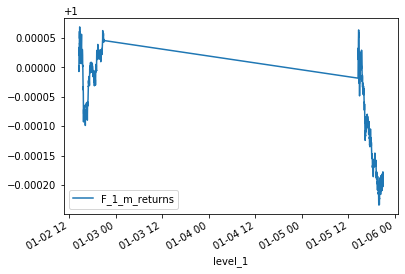

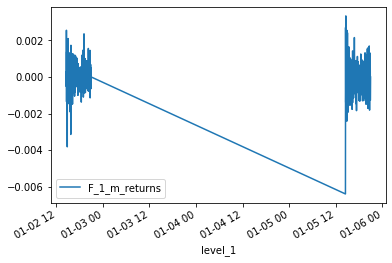

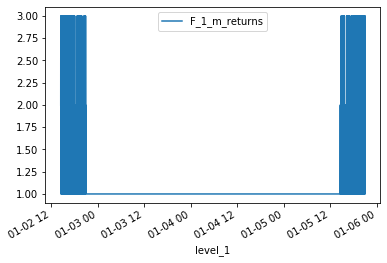

In [43]:
returnAnalysis(df,y_pred,returns='excess_F_1_m_returns',invested_fraction = invested_fraction)

# Preparing the model for Out of Sample and Production

In [35]:
!pip install joblib
#from sklearn.externals import joblib 
import joblib
joblib.dump(cv, 'log_reg_9_18_2020_trained_on_2015_1m_hedged_with_30_tickers.pkl')

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


['log_reg_9_18_2020_trained_on_2015_1m_hedged_with_30_tickers.pkl']

# Out of Sample Tests

In [26]:
!pip install joblib
#from sklearn.externals import joblib 
import joblib
# Load the model from the file 
model = joblib.load('log_9_6_2020_trained_on_2019_data.pkl')  

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
ticker_list = ["AAPL", "MSFT", "GOOGL","GOOG", "BAC","FB","NFLX", "V", "JPM","TSLA","SPY"]
timeframe = '1Min'
#between 40 and 100 now
numDays = 190
#start_date_str = start_date_str = '2015-01' + '-01'
#df_2015 = createData(start_date_str, ticker_list, timeframe, numDays)
#df_2015.to_csv('df_2015.csv')


start_date_str = start_date_str = '2020-01' + '-01'
df_2020 = createData(start_date_str, ticker_list, timeframe, numDays)
df_2020.to_csv('df_2020.csv')

Pulling Prices
Creating Returns now
Pulling Volume now
Creating Volume Z-Score now
Computing Hedged Forward Returns
Computing Hedged 1m Returns
Computing Hedged 2m Returns
Computing Hedged 3m Returns
Computing Hedged 4m Returns
Computing Hedged 5m Returns
Computing Hedged 10m Returns
Computing Hedged 15m Returns
Computing Hedged 30m Returns
Created the table in 144.47 minutes


In [ ]:
start_date_str = '2016-01' + '-01'
timeframe = '1Min'
numDays = 365
df_2016= createData(start_date_str,  timeframe, numDays,production=0, volumeOff=0)
df_2016.to_csv('../df_2016_30_tickers.csv')

Pulling Prices
Creating Returns now
Pulling Volume now


In [ ]:



start_date_str = start_date_str = '2018-01' + '-01'
df_2018 = createData(start_date_str, ticker_list, timeframe, numDays)
#df_2018.to_csv('df_2018.csv')


start_date_str = start_date_str = '2019-01' + '-01'
df_2019 = createData(start_date_str, ticker_list, timeframe, numDays)
df_2019.to_csv('df_2019.csv')

## Loading previously saved data

In [74]:
tic = time.perf_counter()
df_2015 = pd.read_csv('../df_2015_1m_no_lag.csv')
toc = time.perf_counter()
df_2015.set_index(['level_0', 'level_1'], inplace=True)
print(f"loaded the table in {(toc - tic)/60:0.2f} minutes")

loaded the table in 0.09 minutes


In [9]:
df_2020.dropna(inplace=True,axis=1)
X = df_2020.drop(columns=['F_1_m_returns','excess_F_1_m_returns'])
y = np.where(df_2020['F_1_m_returns']>0,1,0)
y_pred= model.predict(X)

count   40977.00000
mean        0.00034
std         0.00206
min        -0.03242
25%        -0.00051
50%         0.00011
75%         0.00121
max         0.02380
Name: F_1_m_returns, dtype: float64


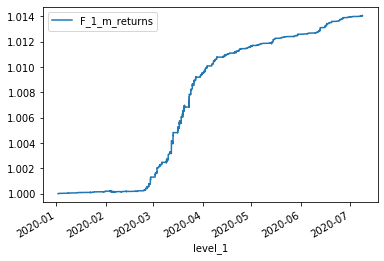

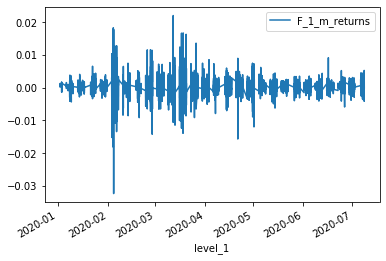

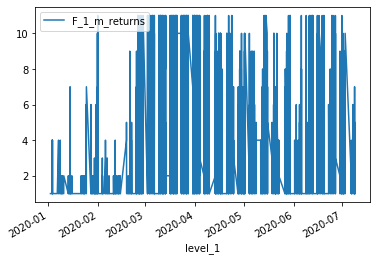

In [13]:
returnAnalysis(df_2020,y_pred,returns='F_1_m_returns',invested_fraction = 0.1)

# Production

In [25]:
# Load the model from the file log_9_6_2020_trained_on_2019_data
model = joblib.load('log_9_6_2020_trained_on_2019_data.pkl')  

NameError: name 'joblib' is not defined

In [22]:
!pip install schedule
import schedule

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [ ]:
#!pip install schedule
import schedule

def job():
    today_s_data = createData(start_date_str, timeframe, numDays,production=1)
    today_s_data.dropna(inplace=True,axis=0)
    X = today_s_data.drop(columns=['F_1_m_returns','excess_F_1_m_returns'],errors='ignore')
    y_pred= model.predict(X) 
    nameOfModel = 'XGBClassifier'
    y_pred2  = pd.DataFrame(y_pred, index=today_s_data.index)
    y_pred2  = y_pred2.rename(columns={y_pred2.columns[0]: nameOfModel})
    y_pred2  = y_pred2.reset_index()
    y_pred2  = y_pred2.drop_duplicates()
    nameOfModel = 'XGBClassifier'
    y_pred2 = y_pred2.loc[str(datetime.datetime.now()- timedelta(minutes=1))]
    print(y_pred2.iloc[-1:].tail())
    print(len(y_pred2))
schedule.clear()

schedule.every().second.do(job)
while True:
    schedule.run_pending()

In [43]:
today_s_data = createData(start_date_str, timeframe, numDays,production=1)
today_s_data.dropna(inplace=True,axis=0)
X = today_s_data.drop(columns=['F_1_m_returns','excess_F_1_m_returns'],errors='ignore')
y_pred= model.predict(X) 



Pulling Prices
Creating Returns now
Computing Hedged Forward Returns
Computing Hedged 1m Returns
Computing Hedged 2m Returns
Computing Hedged 3m Returns
Computing Hedged 4m Returns
Computing Hedged 5m Returns
Computing Hedged 10m Returns
Computing Hedged 15m Returns
Computing Hedged 30m Returns
Created the table in 0.68 minutes


In [50]:
longList = ["AAPL", "MSFT", "GOOGL","GOOG", "BAC","FB","NFLX", "V", "JPM","TSLA","SPY"]
def trade(): 
  portfolio = api.list_positions()
  clock = api.get_clock()
  if clock.is_open == True:
    stock = 0
    print('open')
    while stock <= len(api.list_positions())-1:
      #weight = account.equity/stock
      api.submit_order(portfolio[stock].symbol, side='sell', qty=1, type='market', time_in_force='gtc')
      print("sold " +str(portfolio[stock].symbol))
      stock+=1
    for stock in longList:
      api.submit_order(stock, side='buy', qty=1, type='market', time_in_force='gtc')
      print('bought ' + stock)
  else:
      print('closed')


In [49]:
trade()

closed
